<a href="https://colab.research.google.com/github/MohibUllahKhanSherwani/ml_projects/blob/main/Medical%20insurance%20cost%20prediction%20using%20Linear%20and%20XGboost%20regression/Medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, r2_score
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['sex'].value_counts(), df['smoker'].value_counts(), df['region'].value_counts()

(sex
 male      676
 female    662
 Name: count, dtype: int64,
 smoker
 no     1064
 yes     274
 Name: count, dtype: int64,
 region
 southeast    364
 southwest    325
 northwest    325
 northeast    324
 Name: count, dtype: int64)

In [6]:
df.shape

(1338, 7)

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<Figure size 400x400 with 0 Axes>

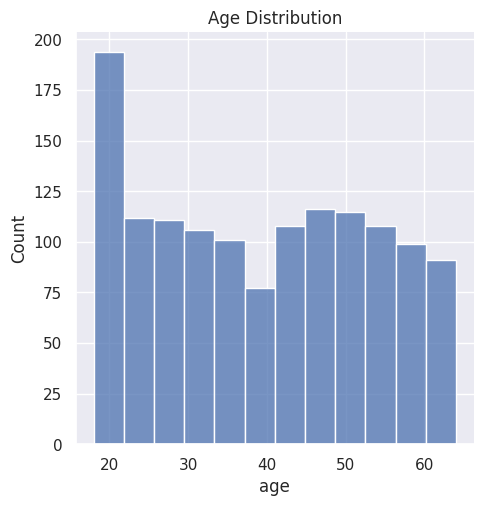

In [25]:
#There are 3 categorical columns --> sex, smoker, region
plt.figure(figsize=(4,4))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

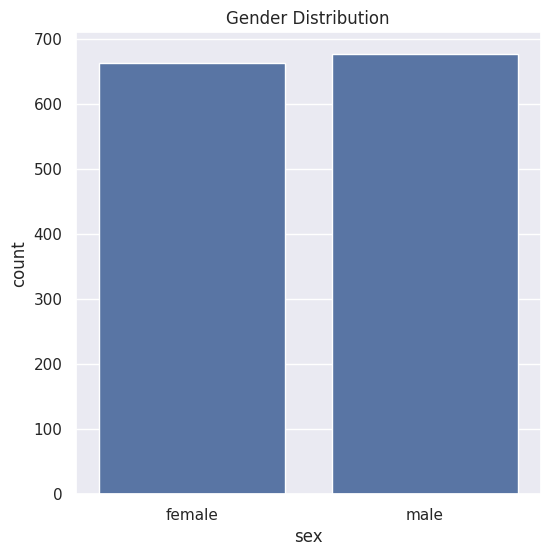

In [34]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

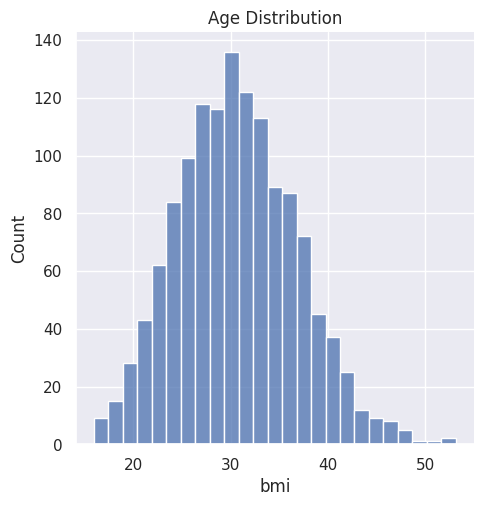

In [36]:
#Bmi column
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('Age Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

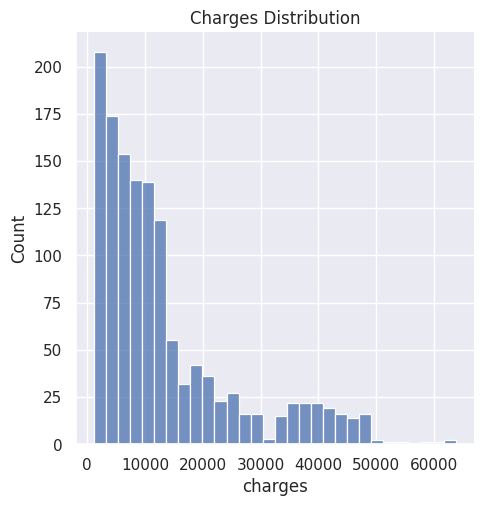

In [37]:
#charges column
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [40]:
#label encoding the categorical columns
df.replace({'sex': {'male':0, 'female':1}}, inplace=True)
df.replace({'smoker': {'yes':0, 'no':1}}, inplace=True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

<ipython-input-40-f38040666159>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex': {'male':0, 'female':1}}, inplace=True)
<ipython-input-40-f38040666159>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker': {'yes':0, 'no':1}}, inplace=True)


In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [43]:
x = df.drop(['charges' ], axis=1)
y = df['charges']

In [45]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [47]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [48]:
#Seperate into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [49]:
print(x_train.shape, x_test.shape, x.shape)

(1070, 6) (268, 6) (1338, 6)


In [50]:
#Training the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [56]:
#Accuracy on training data
training_prediction = model.predict(x_train)
r2_train = metrics.r2_score(y_train, training_prediction)
print('Accuracy on training data ', r2_train)

R Squared value =  0.751505643411174


In [59]:
test_prediction = model.predict(x_test)
r2_test = metrics.r2_score(y_test, test_prediction)
print('Accuracy on test data: ', r2_test)

Accuracy on test data:  0.7447273869684076


In [64]:
xg = xgb.XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
test_prediction = xg.predict(x_test)
r2_test = metrics.r2_score(y_test, test_prediction)
print('Accuracy on test data: ', r2_test)

Accuracy on test data:  0.8144316777193814


In [66]:
training_prediction = xg.predict(x_train)
r2_train = metrics.r2_score(y_train, training_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.9967362176093564
